# K Means Clustering 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#KMC tries to cluster data based on their similarities
#we'll create artificial data

from sklearn.datasets import make_blobs

data=make_blobs(n_samples=200,n_features=2,centers=4,cluster_std=1.8,random_state=101)

In [4]:
data #it a tuple
data[0] #numpy array


array([[-6.42884095e+00,  1.01411174e+01],
       [ 5.86867888e+00,  5.20110356e+00],
       [-3.76109375e-01,  3.26427943e+00],
       [ 2.16679181e+00,  9.56300522e+00],
       [ 5.09508570e+00,  7.20752718e+00],
       [-1.08788882e+01, -6.11318040e+00],
       [ 2.03405554e+00,  9.76664755e+00],
       [-1.71798771e+00,  1.41401140e+00],
       [ 1.16911341e+00,  8.24556988e+00],
       [-1.35185444e+00,  3.13245345e+00],
       [-6.18548214e+00,  9.67406555e+00],
       [-1.19856602e+00,  2.50408937e+00],
       [ 2.90296863e+00,  7.91251003e+00],
       [ 2.39250023e+00,  5.38173971e+00],
       [-5.27545147e+00,  9.63836659e+00],
       [-5.66814687e-01,  5.60262755e-02],
       [ 5.97336628e+00,  5.87172022e+00],
       [-2.31355268e+00,  5.23980092e-01],
       [-1.01344756e+01, -3.43130837e+00],
       [-4.54082629e+00,  1.13920174e+01],
       [-1.04155833e+01, -5.67545836e+00],
       [ 6.64796693e-01,  9.42304718e-02],
       [ 2.11460477e+00,  3.55938488e+00],
       [-1.

In [75]:
data[0][:,0]

array([-6.42884095e+00,  5.86867888e+00, -3.76109375e-01,  2.16679181e+00,
        5.09508570e+00, -1.08788882e+01,  2.03405554e+00, -1.71798771e+00,
        1.16911341e+00, -1.35185444e+00, -6.18548214e+00, -1.19856602e+00,
        2.90296863e+00,  2.39250023e+00, -5.27545147e+00, -5.66814687e-01,
        5.97336628e+00, -2.31355268e+00, -1.01344756e+01, -4.54082629e+00,
       -1.04155833e+01,  6.64796693e-01,  2.11460477e+00, -1.11790221e+01,
       -6.63698251e+00, -7.67422005e+00, -7.98668260e+00,  1.27983684e+00,
        3.54480244e+00,  4.03940181e+00, -2.88118898e+00, -9.11009911e+00,
        5.26001172e+00,  2.05859724e+00, -1.71289834e+00, -5.40562319e+00,
       -1.11995123e+01, -1.13753641e+01, -1.17821836e+01,  1.74815503e+00,
       -9.00392334e+00, -2.86564584e+00, -1.42742293e+00, -3.10933432e+00,
        2.71130095e-01,  8.21556561e-01, -4.11495481e+00,  1.55414928e+00,
       -1.16546211e+01, -1.22009637e+00,  3.22017630e+00, -5.40452892e+00,
        6.02795351e+00,  

In [76]:
data[0][:,1]

array([ 10.14111739,   5.20110356,   3.26427943,   9.56300522,
         7.20752718,  -6.1131804 ,   9.76664755,   1.4140114 ,
         8.24556988,   3.13245345,   9.67406555,   2.50408937,
         7.91251003,   5.38173971,   9.63836659,   0.05602628,
         5.87172022,   0.52398009,  -3.43130837,  11.39201739,
        -5.67545836,   0.09423047,   3.55938488,  -9.30976605,
         6.39426436,  -7.26839654,  -9.57113308,   0.35315078,
         7.93535678,   4.88870433,   9.12919391,  -7.6978166 ,
         4.74007434,  -2.44083039,   2.51221197,   7.47228315,
        -2.55276744,  -4.94525091,  -9.50883007,   2.05595679,
        -6.20816203,   7.52934153,   8.33519078,  10.16414643,
         2.58303824,   6.76966806,   8.02621345,   3.27657687,
        -8.0067372 ,   4.90466211,  -0.5949262 ,   7.19997027,
         4.0169624 ,   0.67345201,  -5.61883075,   5.98523639,
         4.462053  ,   1.81203497,   5.29262653,   6.73039191,
        -7.95924003,   7.46139251,  -4.95353352,   8.48

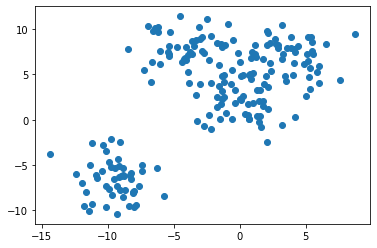

In [5]:
plt.scatter(data[0][:,0],data[0][:,1]) #[:,0]all rows from first column

In [78]:
data


(array([[-6.42884095e+00,  1.01411174e+01],
        [ 5.86867888e+00,  5.20110356e+00],
        [-3.76109375e-01,  3.26427943e+00],
        [ 2.16679181e+00,  9.56300522e+00],
        [ 5.09508570e+00,  7.20752718e+00],
        [-1.08788882e+01, -6.11318040e+00],
        [ 2.03405554e+00,  9.76664755e+00],
        [-1.71798771e+00,  1.41401140e+00],
        [ 1.16911341e+00,  8.24556988e+00],
        [-1.35185444e+00,  3.13245345e+00],
        [-6.18548214e+00,  9.67406555e+00],
        [-1.19856602e+00,  2.50408937e+00],
        [ 2.90296863e+00,  7.91251003e+00],
        [ 2.39250023e+00,  5.38173971e+00],
        [-5.27545147e+00,  9.63836659e+00],
        [-5.66814687e-01,  5.60262755e-02],
        [ 5.97336628e+00,  5.87172022e+00],
        [-2.31355268e+00,  5.23980092e-01],
        [-1.01344756e+01, -3.43130837e+00],
        [-4.54082629e+00,  1.13920174e+01],
        [-1.04155833e+01, -5.67545836e+00],
        [ 6.64796693e-01,  9.42304718e-02],
        [ 2.11460477e+00,  3.559

In [11]:
data[1] #second item of tuple, those are clusters that belongs to data

array([3, 2, 0, 2, 2, 1, 2, 0, 2, 0, 3, 0, 2, 2, 3, 0, 2, 0, 1, 3, 1, 0,
       0, 1, 3, 1, 1, 0, 2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 1, 2, 1, 3, 3, 3,
       0, 3, 3, 0, 1, 2, 0, 3, 2, 0, 1, 3, 0, 0, 3, 2, 1, 2, 1, 3, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 3, 1, 2, 2, 0, 3, 0, 0, 1, 2, 1, 0, 0, 0, 3,
       2, 1, 1, 1, 1, 3, 0, 1, 2, 3, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1,
       0, 3, 3, 2, 1, 2, 3, 3, 2, 3, 0, 3, 0, 3, 0, 2, 3, 0, 1, 3, 3, 3,
       0, 1, 1, 3, 2, 3, 2, 0, 1, 2, 1, 3, 3, 2, 0, 1, 3, 3, 3, 3, 0, 2,
       0, 3, 2, 2, 2, 0, 2, 0, 0, 3, 1, 3, 0, 2, 3, 0, 2, 0, 3, 3, 0, 3,
       2, 2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 2, 2, 3, 1, 0, 2, 2,
       1, 0])

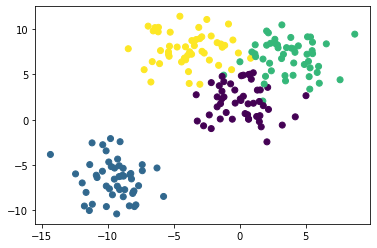

In [12]:
plt.scatter(data[0][:,0],data[0][:,1],c=data[1]) #c will change color based on groupsfrom 

In [13]:
from sklearn.cluster import KMeans #unsupervized

In [14]:
kmeans=KMeans(n_clusters=4)

In [15]:
kmeans.fit(data[0]) #fit to features, that is first value from tuple of data

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
kmeans.cluster_centers_

array([[ 3.71749226,  7.01388735],
       [-9.46941837, -6.56081545],
       [-0.0123077 ,  2.13407664],
       [-4.13591321,  7.95389851]])

In [17]:
kmeans.labels_ #predicted labels by KMeans


array([3, 0, 2, 0, 0, 1, 0, 2, 0, 2, 3, 2, 0, 0, 3, 2, 0, 2, 1, 3, 1, 2,
       2, 1, 3, 1, 1, 2, 0, 0, 3, 1, 0, 2, 2, 3, 1, 1, 1, 2, 1, 3, 3, 3,
       2, 0, 3, 2, 1, 2, 2, 3, 0, 2, 1, 3, 2, 2, 3, 0, 1, 0, 1, 3, 0, 2,
       1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 0, 2, 3, 2, 2, 1, 0, 1, 2, 2, 2, 3,
       2, 1, 1, 1, 1, 2, 2, 1, 0, 3, 1, 0, 2, 1, 2, 2, 0, 2, 1, 0, 1, 1,
       0, 3, 3, 0, 1, 0, 3, 3, 0, 3, 2, 3, 2, 3, 2, 0, 3, 2, 1, 3, 3, 3,
       2, 1, 1, 3, 0, 3, 0, 2, 1, 0, 1, 3, 3, 0, 2, 1, 3, 3, 3, 3, 2, 0,
       2, 3, 0, 0, 0, 2, 0, 2, 2, 3, 1, 3, 2, 0, 3, 2, 0, 2, 3, 0, 2, 3,
       0, 0, 1, 0, 3, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 0, 0, 3, 1, 2, 0, 0,
       1, 2], dtype=int32)

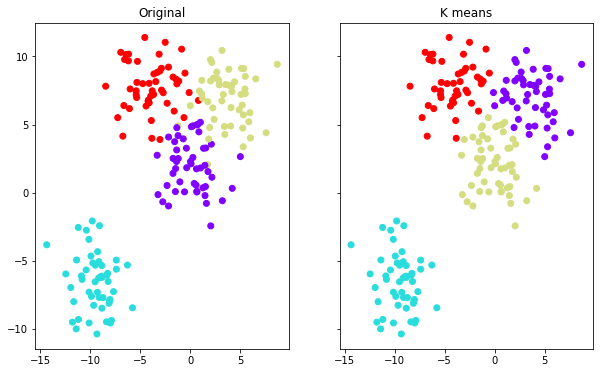

In [21]:
#in real world we're done here since we don;t knwo the result
#in these case we created data so we know labels= data[1]
fig,((ax1),(ax2)) = plt.subplots(1,2, sharey=True, figsize=(10,6))
ax1.set_title('Original')
ax1.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')
ax2.set_title('K means')
ax2.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
#colors are meaningless

# Second project

When using the Kmeans algorithm under normal circumstances, it is because you don't have labels. In this case we will use the labels to try to get an idea of how well the algorithm performed, but you won't usually do this for Kmeans, so the classification report and confusion matrix at the end of this project, don't truly make sense in a real world setting!.

In [54]:
df=pd.read_csv('/Users/Taninka/Downloads/Refactored_Py_DS_ML_Bootcamp-master/17-K-Means-Clustering/College_Data',index_col=0)

In [55]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [57]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


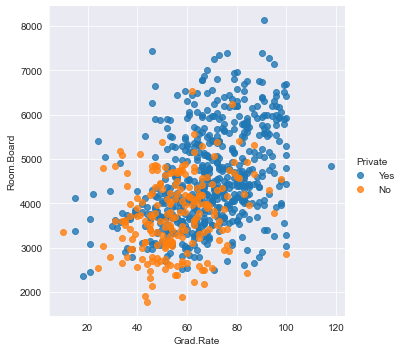

In [58]:
sns.lmplot(x='Grad.Rate',y='Room.Board',data=df,hue='Private',fit_reg=False)

/Users/Taninka/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


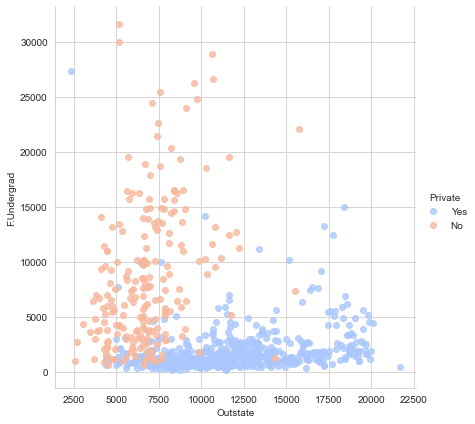

In [59]:
sns.set_style('whitegrid')
sns.lmplot(x='Outstate', y= 'F.Undergrad', data=df, hue='Private',palette='coolwarm',size=6,aspect=1,fit_reg=False)

/Users/Taninka/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


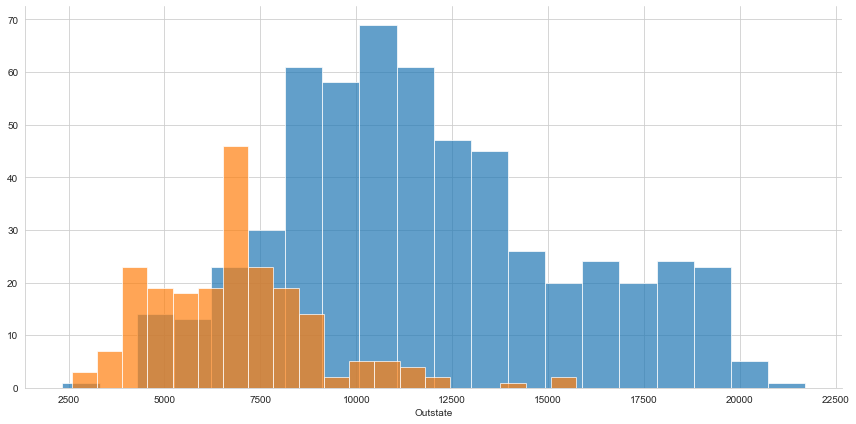

In [60]:
g=sns.FacetGrid(df,hue='Private',size=6,aspect=2)
g=g.map(plt.hist,'Outstate',bins=20,alpha=0.7)

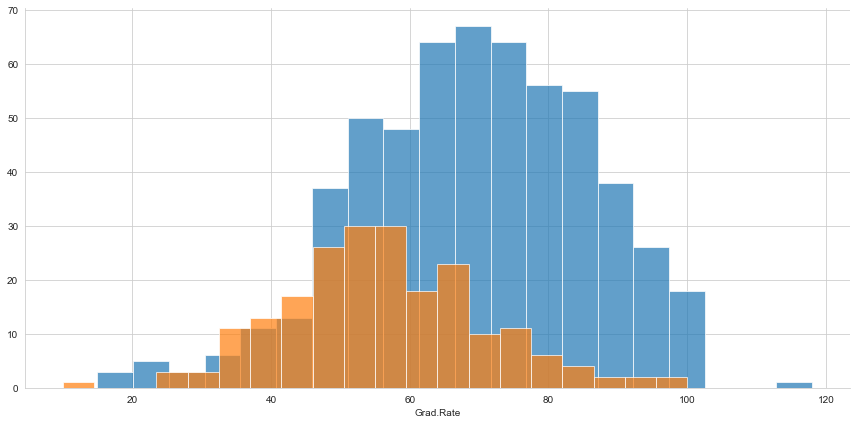

In [61]:
g=sns.FacetGrid(df,hue='Private',size=6,aspect=2)
g=g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

In [62]:
df[df['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [63]:
df['Grad.Rate']['Cazenovia College'] = 100 #pre dany stlpec zoberiem index a priradim mu hodnotu

/Users/Taninka/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
df[df['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


/Users/Taninka/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


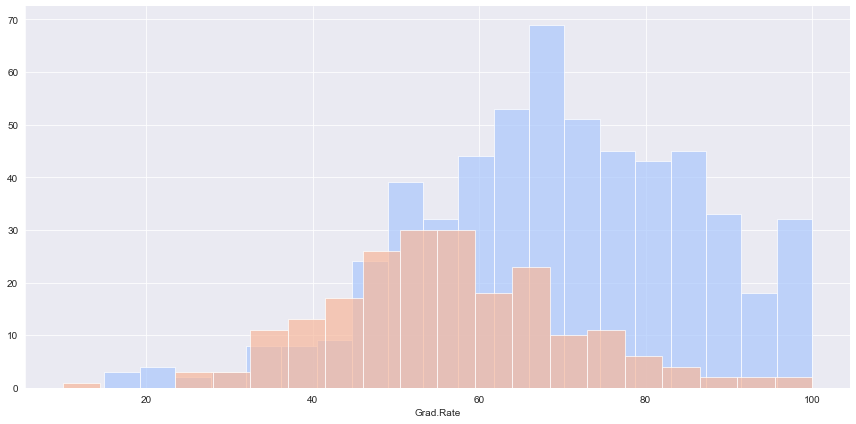

In [65]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

from sklearn.cluster import KMeans

km=KMeans(n_clusters=2)
km.fit(df.drop('Private',axis=1))

In [67]:
km.cluster_centers_


array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01]])

In [68]:
def converter(cluster):
    if cluster =='Yes':
        return 1
    else:
        return 0

In [69]:
df['Cluster']=df['Private'].apply(converter)

In [70]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [73]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['Cluster'],km.labels_))
print(classification_report(df['Cluster'],km.labels_))

[[ 74 138]
 [ 34 531]]
              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777

